# Import modules and data

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline


In [3]:
taxi_df_full = pd.read_csv('./data/taxi.csv')

In [4]:
taxi_df_full.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN


In [5]:
taxi_df_full.shape

(7667792, 18)

# Data exploration

In [6]:
taxi_df_full.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [33]:
taxi_df = taxi_df_full[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
                        'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 
                        'payment_type', 'total_amount']]

In [34]:
taxi_df[taxi_df.isnull()].sum()

tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count         0.00
trip_distance           0.00
RatecodeID              0.00
PULocationID            0.00
DOLocationID            0.00
payment_type            0.00
total_amount            0.00
dtype: object

In [35]:
taxi_df.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [36]:
taxi_df.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00
mean,1.57,2.80,1.06,165.50,163.75,1.29,15.68
std,1.22,3.74,0.68,66.39,70.36,0.47,262.29
min,0.00,0.00,1.00,1.00,1.00,1.00,-362.80
25%,1.00,0.90,1.00,130.00,113.00,1.00,8.19
50%,1.00,1.53,1.00,162.00,162.00,1.00,11.27
75%,2.00,2.80,1.00,234.00,234.00,2.00,16.56
max,9.00,831.80,99.00,265.00,265.00,4.00,623261.66


array([[<AxesSubplot: title={'center': 'passenger_count'}>,
        <AxesSubplot: title={'center': 'trip_distance'}>,
        <AxesSubplot: title={'center': 'RatecodeID'}>],
       [<AxesSubplot: title={'center': 'PULocationID'}>,
        <AxesSubplot: title={'center': 'DOLocationID'}>,
        <AxesSubplot: title={'center': 'payment_type'}>],
       [<AxesSubplot: title={'center': 'total_amount'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

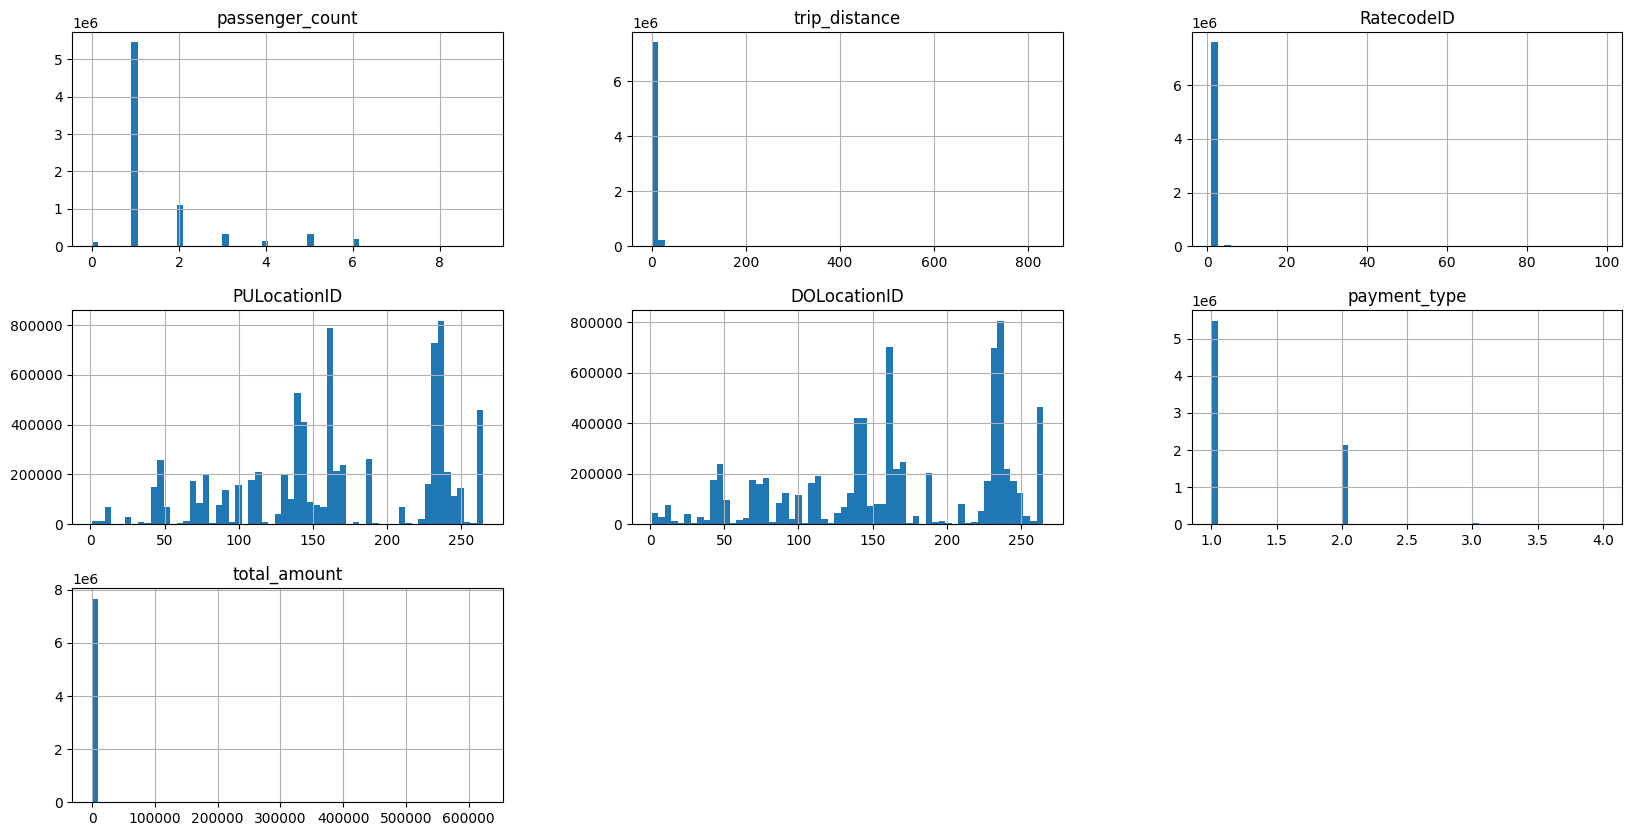

In [37]:
taxi_df.hist(figsize=(20,10), bins=60)

<AxesSubplot: xlabel='index', ylabel='total_amount'>

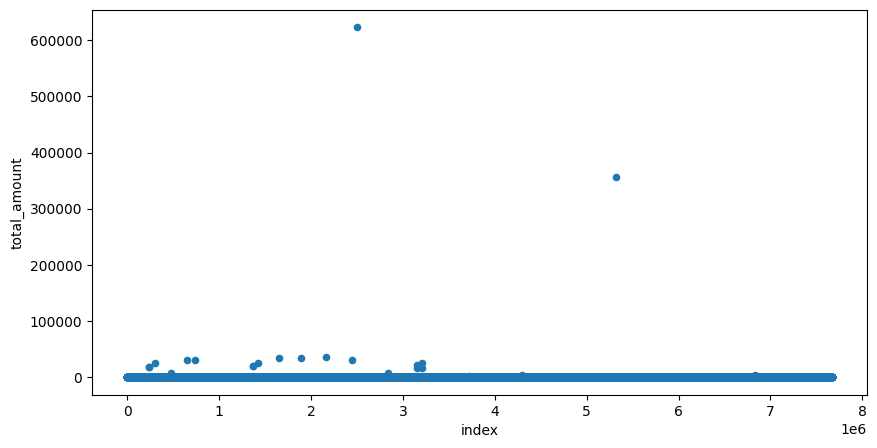

In [38]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<AxesSubplot: xlabel='index', ylabel='total_amount'>

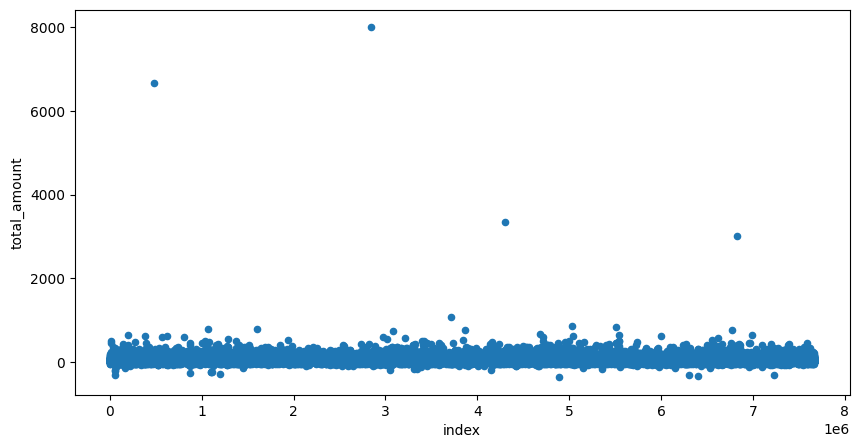

In [39]:
taxi_df[taxi_df['total_amount'] <= 15000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

(7131, 9)


<AxesSubplot: xlabel='index', ylabel='total_amount'>

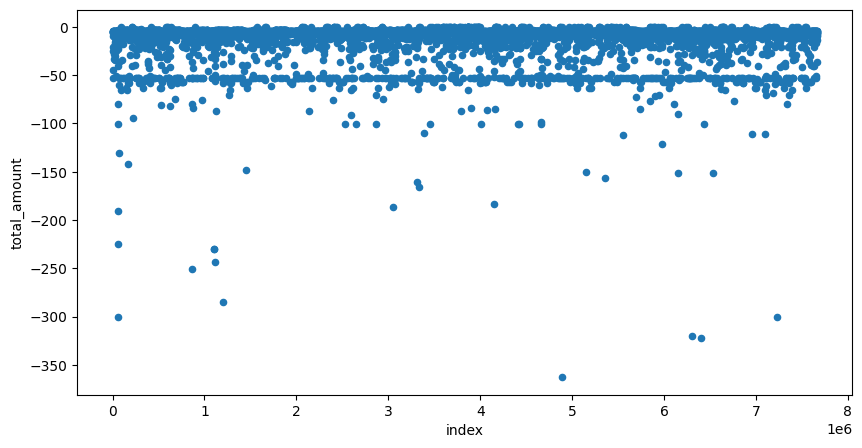

In [43]:
print(taxi_df[taxi_df['total_amount'] < 0].shape)

taxi_df[taxi_df['total_amount'] < 0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [44]:
taxi_df[taxi_df['total_amount'] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.80
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.30
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.80
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.80
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.30


In [45]:
taxi_df[taxi_df['total_amount'] <0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

In [46]:
taxi_df.drop(taxi_df[taxi_df['total_amount'] < 0].index, inplace=True)

C:\Users\Craig\AppData\Local\Temp\ipykernel_11136\2869970515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df.drop(taxi_df[taxi_df['total_amount'] < 0].index, inplace=True)


In [47]:
taxi_df[taxi_df['total_amount'] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount


<AxesSubplot: xlabel='index', ylabel='total_amount'>

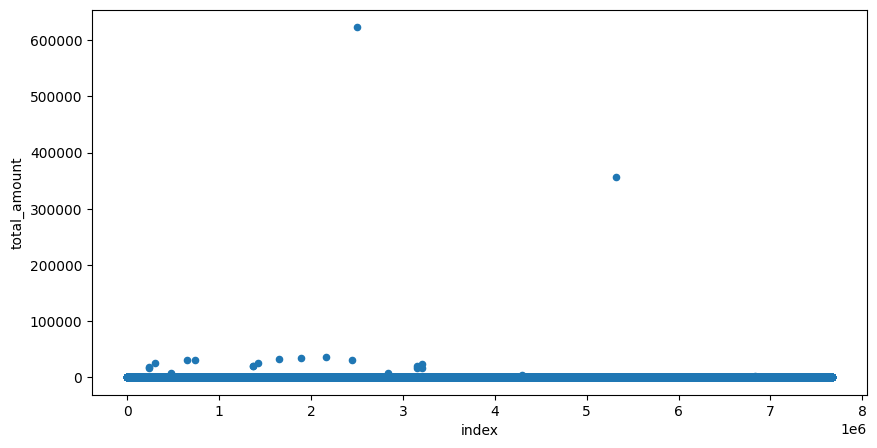

In [48]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [51]:
print(taxi_df[taxi_df['total_amount'] == 0].shape)
taxi_df[taxi_df['total_amount'] == 0].head()

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.00,5,186,264,2,0.00
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.00,5,246,264,2,0.00
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.00,1,193,193,1,0.00
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.00,1,7,7,2,0.00
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.00,1,264,7,2,0.00


<AxesSubplot: >

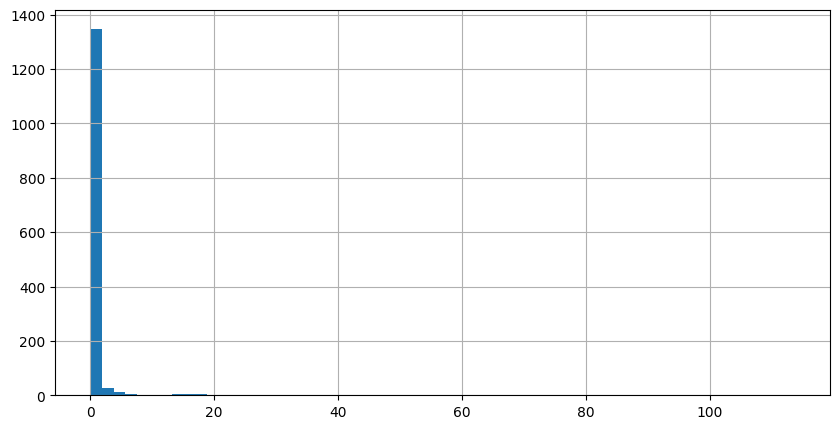

In [55]:
taxi_df[taxi_df['total_amount'] == 0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [58]:
taxi_df[taxi_df['total_amount'] == 0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

In [60]:
taxi_df.drop(taxi_df[taxi_df['total_amount'] == 0].index, inplace=True)

C:\Users\Craig\AppData\Local\Temp\ipykernel_11136\2249210869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df.drop(taxi_df[taxi_df['total_amount'] == 0].index, inplace=True)


In [61]:
taxi_df[taxi_df['total_amount'] == 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount


In [ ]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [62]:
taxi_df[taxi_df['total_amount'] > 500].shape

(56, 9)

In [63]:
taxi_df[taxi_df['total_amount'] > 300].shape

(307, 9)

In [65]:
taxi_df[taxi_df['total_amount'] > 200].shape

(1166, 9)

In [66]:
taxi_df[taxi_df['total_amount'] > 100].shape

(10832, 9)

In [67]:
taxi_df['total_amount'].mean()

15.710144480260269

In [68]:
taxi_df['total_amount'].median()

11.27

In [70]:
taxi_df.drop(taxi_df[taxi_df['total_amount'] > 200].index, inplace=True)

C:\Users\Craig\AppData\Local\Temp\ipykernel_11136\426183536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df.drop(taxi_df[taxi_df['total_amount'] > 200].index, inplace=True)


In [71]:
taxi_df['total_amount'].max()

200.0